<AxesSubplot:xlabel='x1', ylabel='x2'>

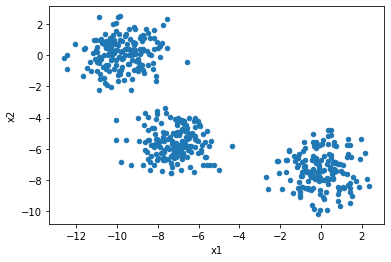

In [1]:
from pandas import DataFrame
from sklearn.datasets import make_blobs

N_CLUSTERS = 3

data, true_labels = make_blobs(n_samples=500, centers=N_CLUSTERS, random_state=9)

points = DataFrame(data, columns=["x1", "x2"])
points.plot.scatter("x1", "x2")

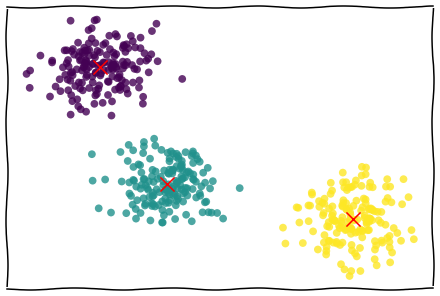

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from sklearn.cluster import KMeans

# First set up the figure, the axis, and the plot element we want to animate
with plt.xkcd():
    fig, ax = plt.subplots(constrained_layout=True)
#fig.set_constrained_layout_pads(w_pad=10/72, h_pad=10/72)
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)
#ax.set_xlabel("x1")
#ax.set_ylabel("x2")

# Here we create the initial path objects which will be altered each frame.
p = ax.scatter(points["x1"], points["x2"], edgecolor="none", s=60, alpha=0.8)
x = ax.scatter([], [], c="red", s=200, marker="x")

def animate(i):
    kmeans = KMeans(n_clusters=N_CLUSTERS, n_init=1, max_iter=i+1, random_state=1, init="random").fit(points)
    p.set_array(kmeans.labels_)  # Update the colours
    x.set_offsets(kmeans.cluster_centers_)  # Update the positions
    return p,

anim = animation.FuncAnimation(fig, animate, frames=30, interval=400, blit=True)

#anim.save("kmeans.mp4", extra_args=["-vcodec", "libx264"])
anim.save("kmeans.gif", writer="imagemagick")

In [3]:
!gifsicle -b -O3 kmeans.gif

gifsicle:kmeans.gif: warning: too many colors, using local colormaps
  (You may want to try ‘--colors 256’.)
